In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'stud.csv')

In [ ]:
file_path = 'stud.csv'
df = pd.read_csv(file_path)
print(df.head())

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

*  gender : sex of students -> (Male/female)
*  race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
*  parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
*  lunch : having lunch before test (standard or free/reduced)
*  test preparation course : complete or not complete before test
*  math score
*  reading score
*  writing score





In [7]:
#Checking for Missing values :
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#checking for duplicates:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#checking for duplicate values
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
#statistics of the data:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Create separate DataFrames for numerical and categorical features
numerical_features = df[numerical_columns]
categorical_features = df[categorical_columns]

In [14]:
numerical_columns

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [15]:
categorical_columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [16]:
for i in categorical_columns:
  print("categories in {} Feature:".format(i), end =" ")
  print(df[i].unique())

categories in gender Feature: ['female' 'male']
categories in race_ethnicity Feature: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education Feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch Feature: ['standard' 'free/reduced']
categories in test_preparation_course Feature: ['none' 'completed']


In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding two new features with the help of features which we have in data set

In [18]:
df['Total_Score'] = df['math_score']+df['reading_score']+df['writing_score']

In [19]:
df["Average"] = df['Total_Score']/3

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_fullscore = df[df['reading_score']==100]["Average"].count()
writing_fullscore = df[df['writing_score']==100]["Average"].count()
math_fullscore = df[df['math_score']==100]["Average"].count()
print(f'no of students with full marks in reading :{reading_fullscore}')
print(f'no of students with full marks in maths:{math_fullscore}')
print(f'no of students with full marks in writing :{writing_fullscore}')

no of students with full marks in reading :17
no of students with full marks in maths:7
no of students with full marks in writing :14


In [22]:
reading_score_less_20 = df[df['reading_score']<=20]["Average"].count()
writing_score_less_20 = df[df['writing_score']<=20]["Average"].count()
math_score_less_20 = df[df['math_score']<=20]["Average"].count()
print(f'no of students with full marks in reading :{reading_score_less_20}')
print(f'no of students with full marks in maths:{math_score_less_20}')
print(f'no of students with full marks in writing :{writing_score_less_20}')

no of students with full marks in reading :1
no of students with full marks in maths:4
no of students with full marks in writing :3


**Data Visualization**


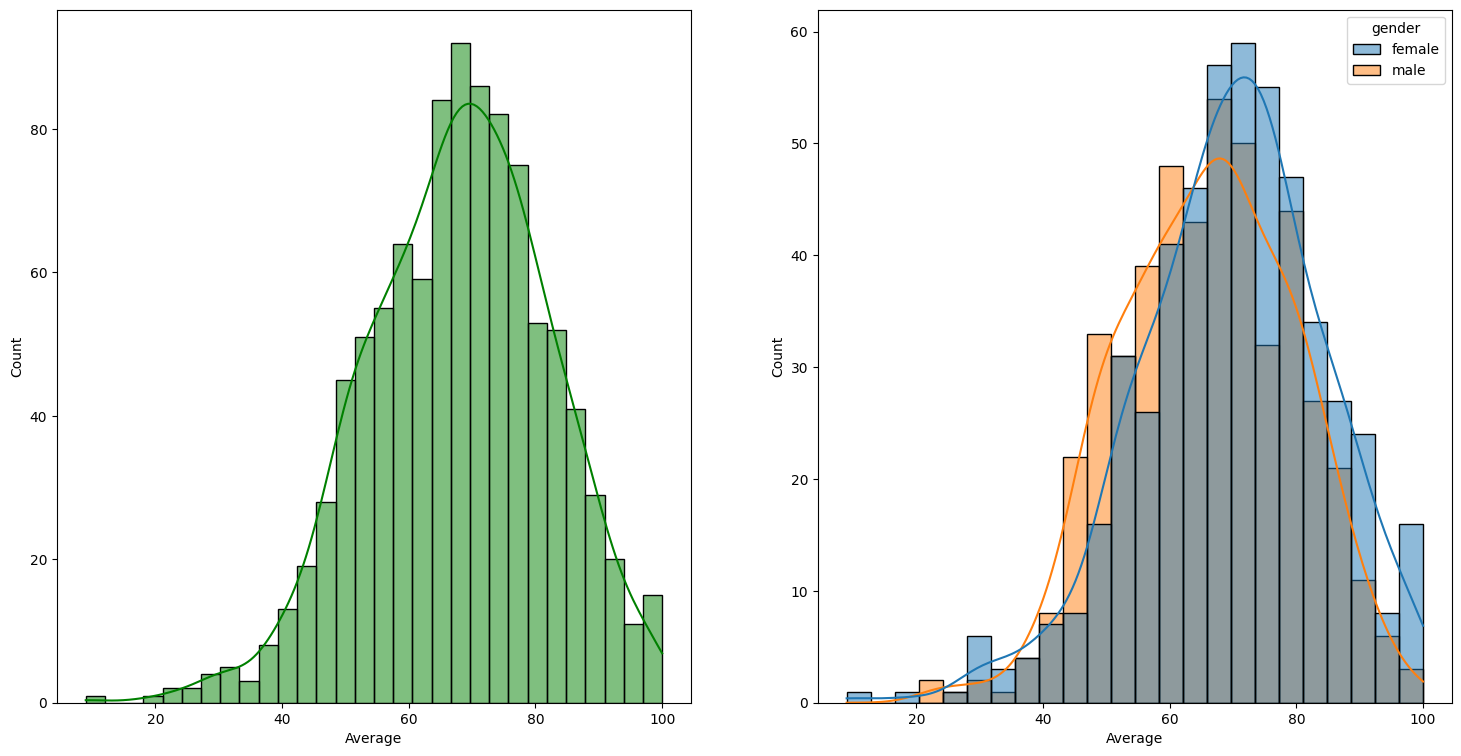

In [23]:
fig, axs = plt.subplots(1, 2 , figsize = (18,9))
plt.subplot(121)
sns.histplot(data = df, x= 'Average', bins =30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data =df , x= 'Average', kde=True, hue = 'gender')
plt.show()

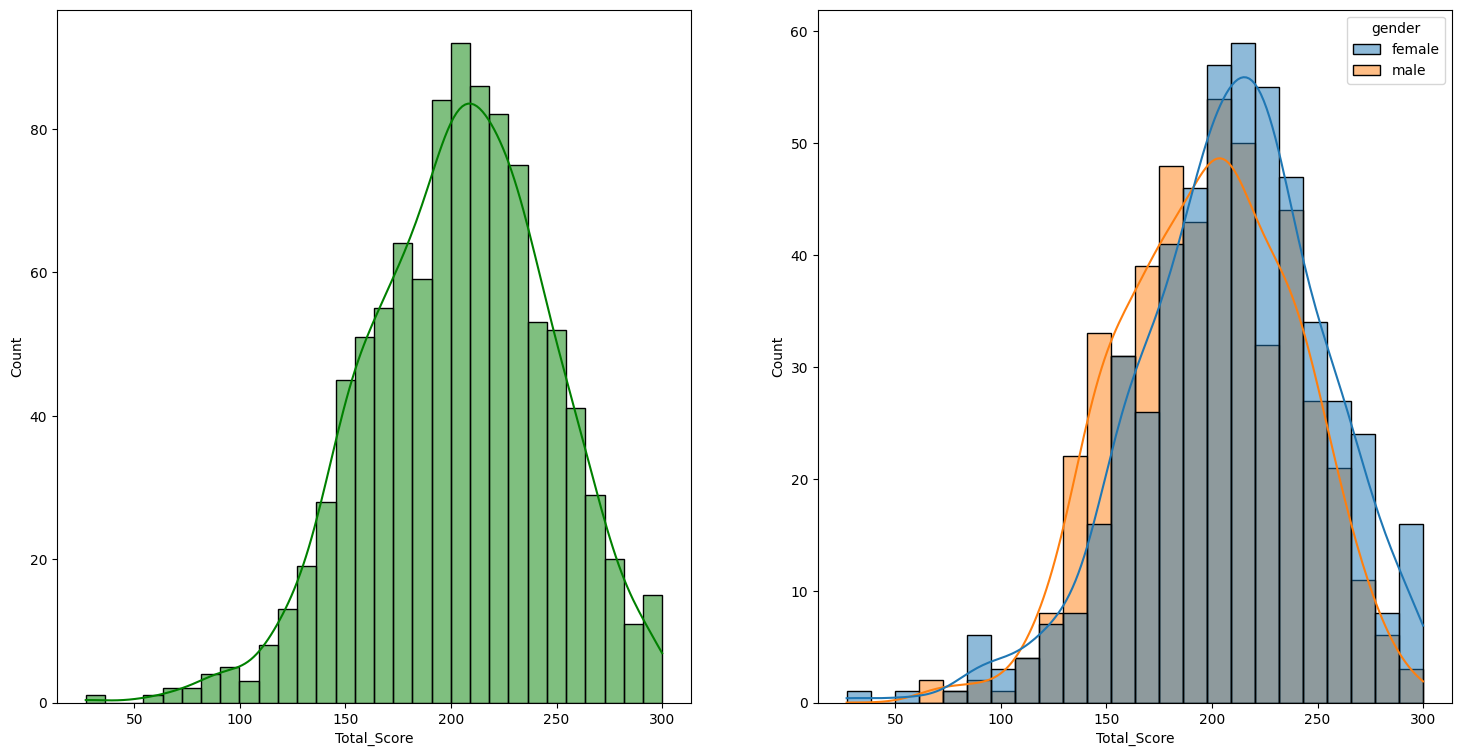

In [24]:
fig, axs = plt.subplots(1, 2 , figsize = (18,9))
plt.subplot(121)
sns.histplot(data = df, x= 'Total_Score', bins =30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data =df , x= 'Total_Score', kde=True, hue = 'gender')
plt.show()

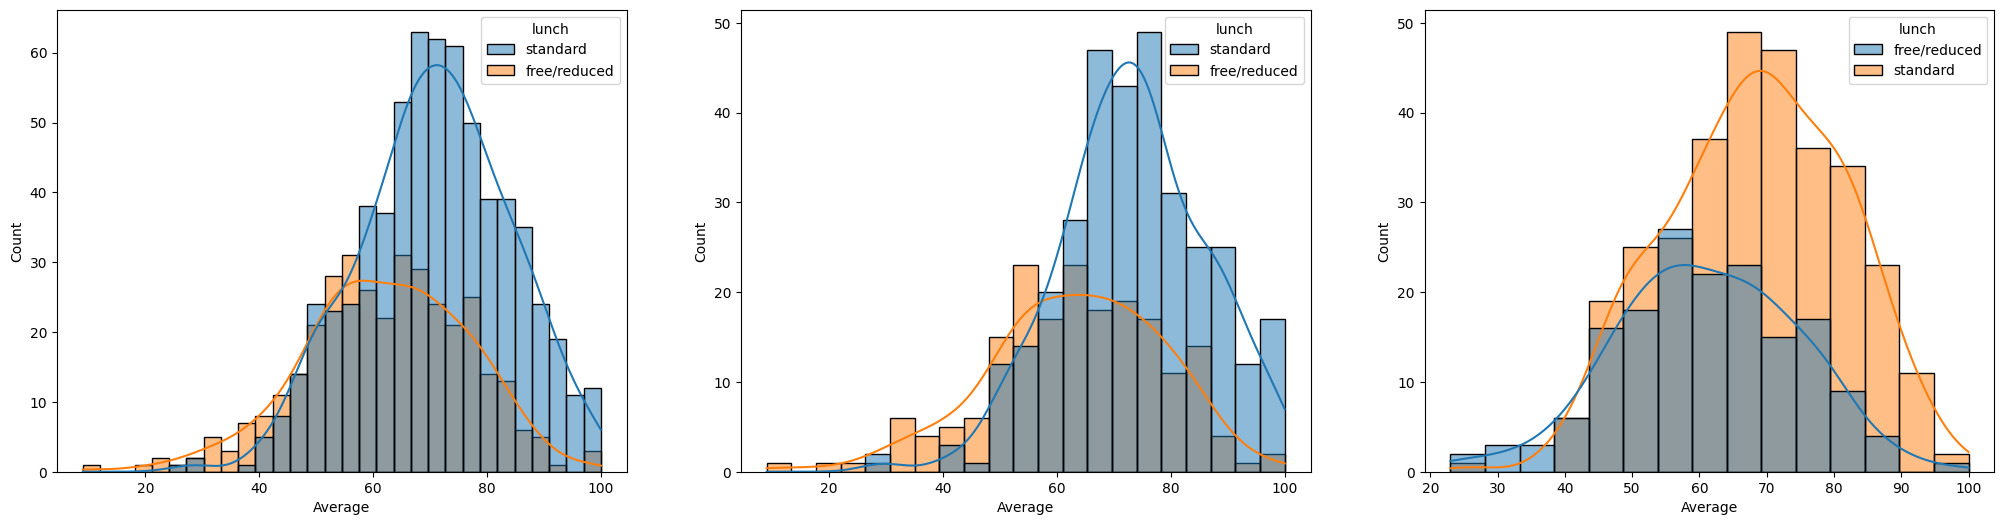

In [25]:
fig, axs = plt.subplots(1, 3 , figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x= 'Average', bins =30, kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data =df[df.gender=='female'] , x= 'Average', kde=True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data =df[df.gender=='male'] , x= 'Average', kde=True, hue = 'lunch')
plt.show()

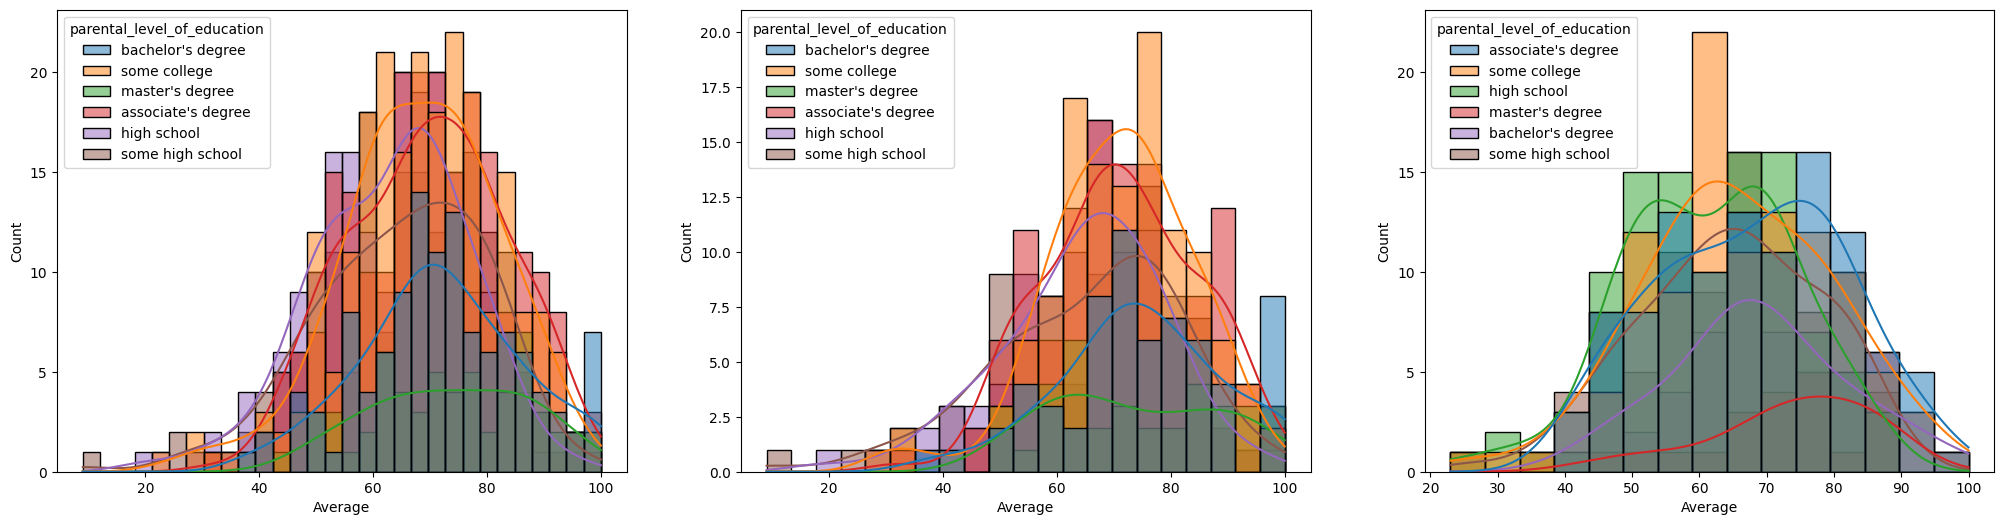

In [26]:
fig, axs = plt.subplots(1, 3 , figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x= 'Average', bins =30, kde = True, hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data =df[df.gender=='female'] , x= 'Average', kde=True, hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data =df[df.gender=='male'] , x= 'Average', kde=True, hue = 'parental_level_of_education')
plt.show()

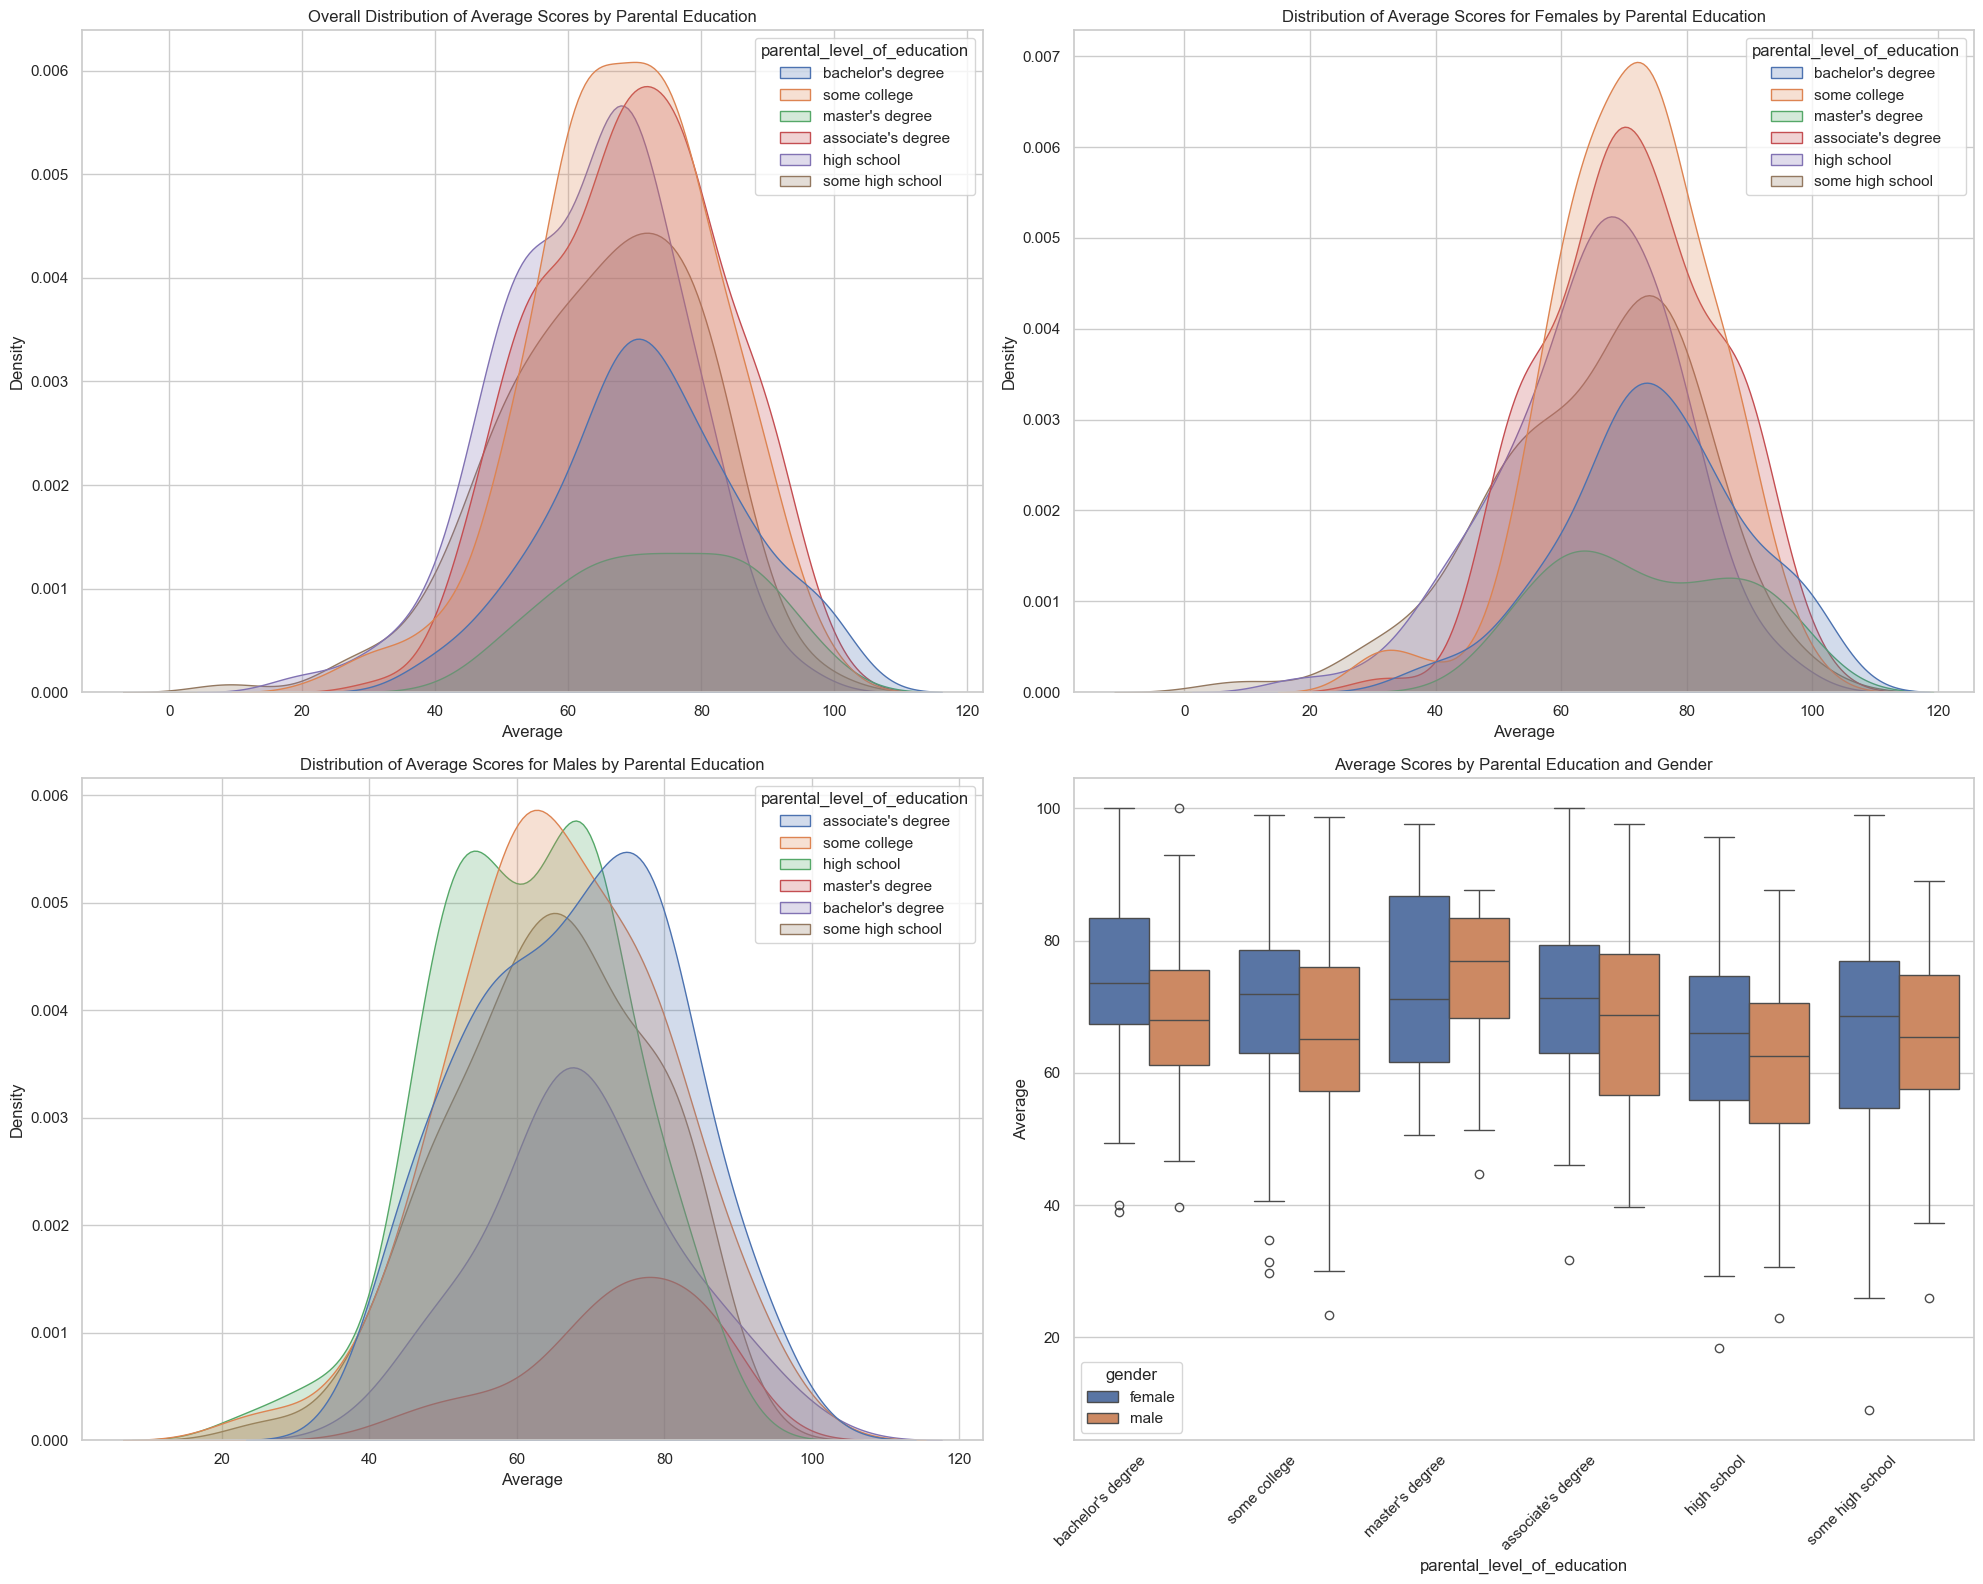

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the Seaborn style
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("notebook")

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Overall KDE plot
sns.kdeplot(data=df, x='Average', hue='parental_level_of_education', shade=True, ax=axs[0, 0])
axs[0, 0].set_title('Overall Distribution of Average Scores by Parental Education')

# Female KDE plot
sns.kdeplot(data=df[df.gender=='female'], x='Average', hue='parental_level_of_education', shade=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Average Scores for Females by Parental Education')

# Male KDE plot
sns.kdeplot(data=df[df.gender=='male'], x='Average', hue='parental_level_of_education', shade=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Average Scores for Males by Parental Education')

# Boxplot
sns.boxplot(data=df, x='parental_level_of_education', y='Average', hue='gender', ax=axs[1, 1])
axs[1, 1].set_title('Average Scores by Parental Education and Gender')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In general parent's education don't help student perform well in exam.


3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

2nd plot we can see there is no effect of parent's education on female students.

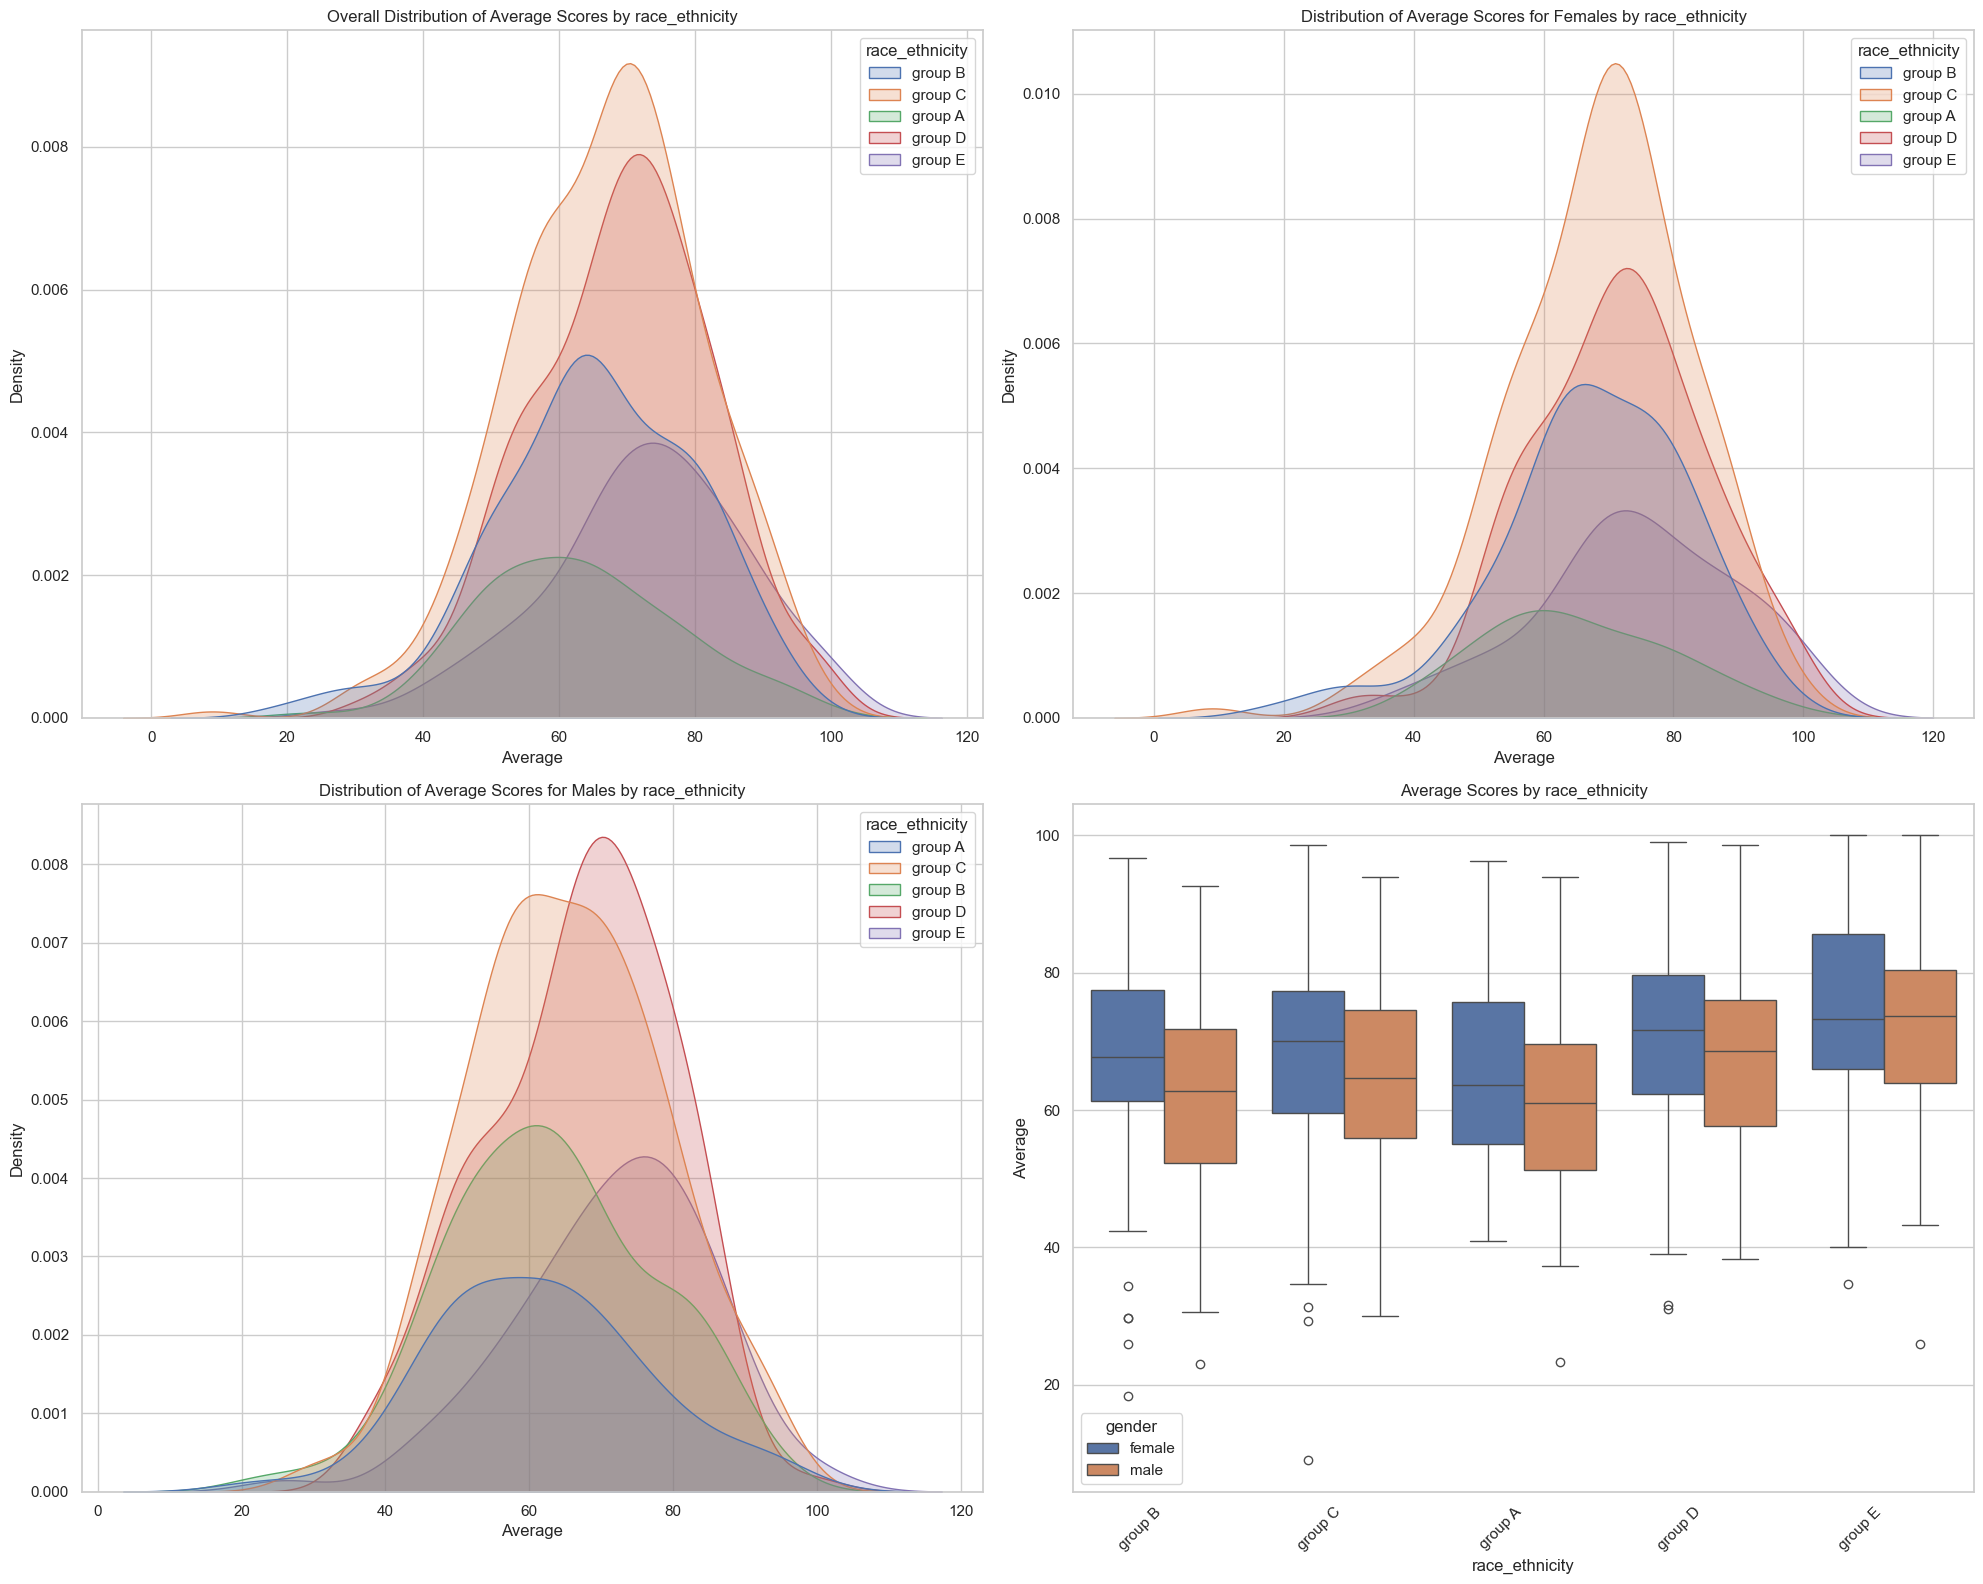

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the Seaborn style
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("notebook")

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Overall KDE plot
sns.kdeplot(data=df, x='Average', hue='race_ethnicity', shade=True, ax=axs[0, 0])
axs[0, 0].set_title('Overall Distribution of Average Scores by race_ethnicity')

# Female KDE plot
sns.kdeplot(data=df[df.gender=='female'], x='Average', hue='race_ethnicity', shade=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Average Scores for Females by race_ethnicity')

# Male KDE plot
sns.kdeplot(data=df[df.gender=='male'], x='Average', hue='race_ethnicity', shade=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Average Scores for Males by race_ethnicity')

# Boxplot
sns.boxplot(data=df, x='race_ethnicity', y='Average', hue='gender', ax=axs[1, 1])
axs[1, 1].set_title('Average Scores by race_ethnicity')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [29]:
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_Score', 'Average'],
      dtype='object')


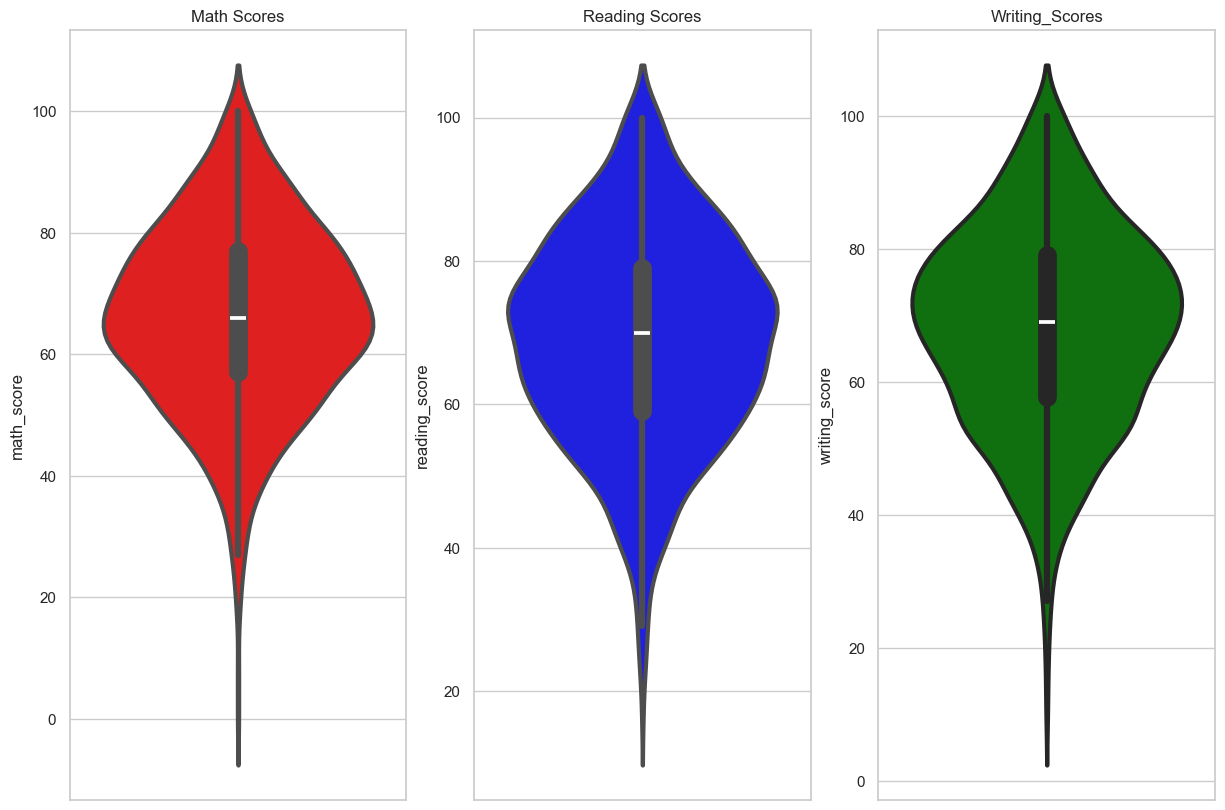

In [30]:
#maximum score of students in all the subjects
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(y='math_score',data =df, color= 'red', linewidth =3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y='reading_score',data =df, color= 'blue', linewidth =3)
plt.subplot(1,4,3)
plt.title("Writing_Scores")
sns.violinplot(y='writing_score',data =df, color= 'green', linewidth =3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

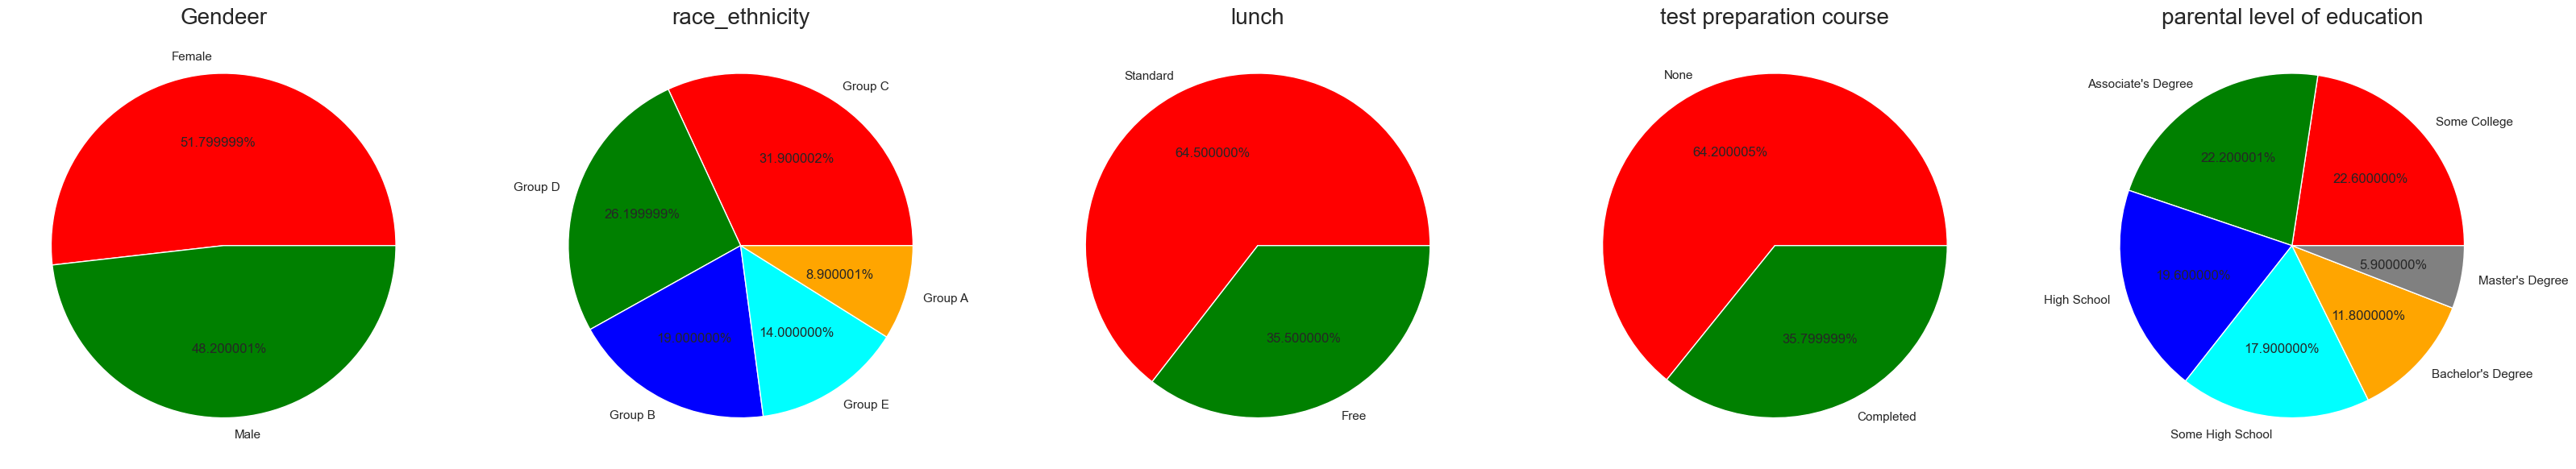

In [31]:
plt.rcParams['figure.figsize'] = (40,30)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red', 'green']

plt.pie(size, colors=color,labels= labels, autopct= '%2f%%')
plt.title("Gendeer", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C','Group D', 'Group B', 'Group E','Group A'
color = ['red', 'green', 'blue','cyan','orange']

plt.pie(size, colors=color,labels= labels, autopct= '%2f%%')
plt.title("race_ethnicity", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color,labels= labels, autopct= '%2f%%')
plt.title("lunch", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red', 'green']

plt.pie(size, colors=color,labels= labels, autopct= '%2f%%')
plt.title("test preparation course", fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue','cyan','orange','grey']

plt.pie(size, colors=color,labels= labels, autopct= '%2f%%')
plt.title("parental level of education", fontsize = 20)
plt.axis('off')

Number of Male and Female students is almost equal.

Number students are greatest in Group C

Number of students who have standard lunch are greater.

Number of students who have not enrolled in any test preparation course is greater.

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

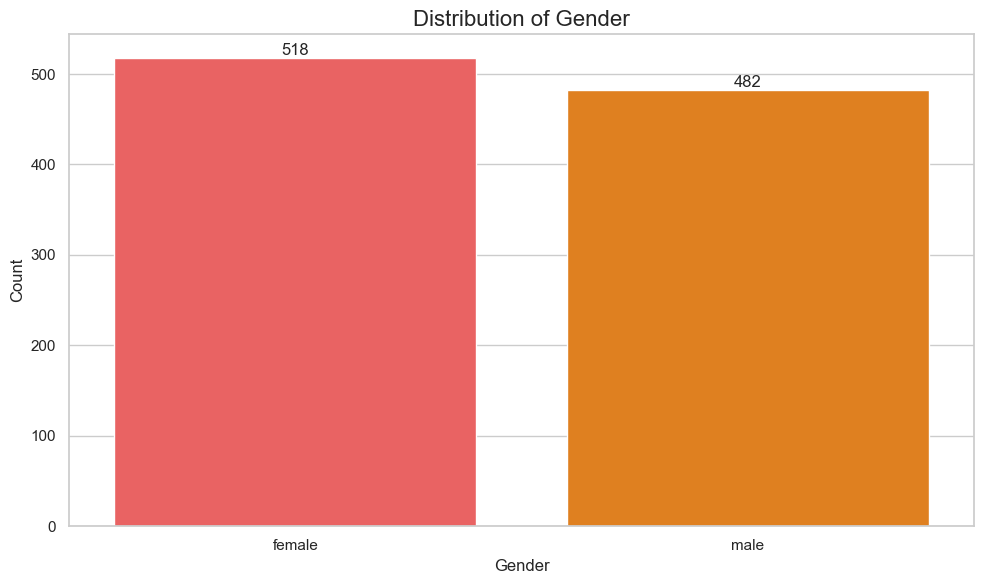

In [32]:
#checking for the distribution of the gender feature
#checking if the gender is having any impact on the student performance
# Use Seaborn's styling functions
sns.set_theme()
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Use seaborn's countplot for a simple bar chart
sns.countplot(x='gender', data=df, palette=['#ff4d4d', '#ff8000'])

# Add value labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i, label_type='edge')

# Customize the plot
plt.title('Distribution of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


In [33]:
print(df.dtypes)

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
Total_Score                      int64
Average                        float64
dtype: object


In [34]:
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math_score  reading_score  writing_score  Total_Score    Average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


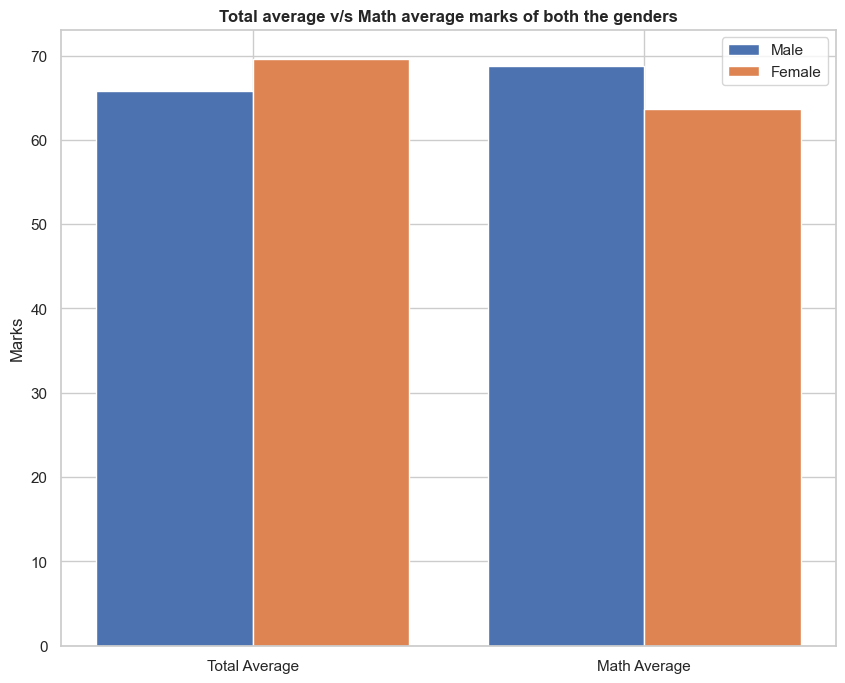

In [35]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

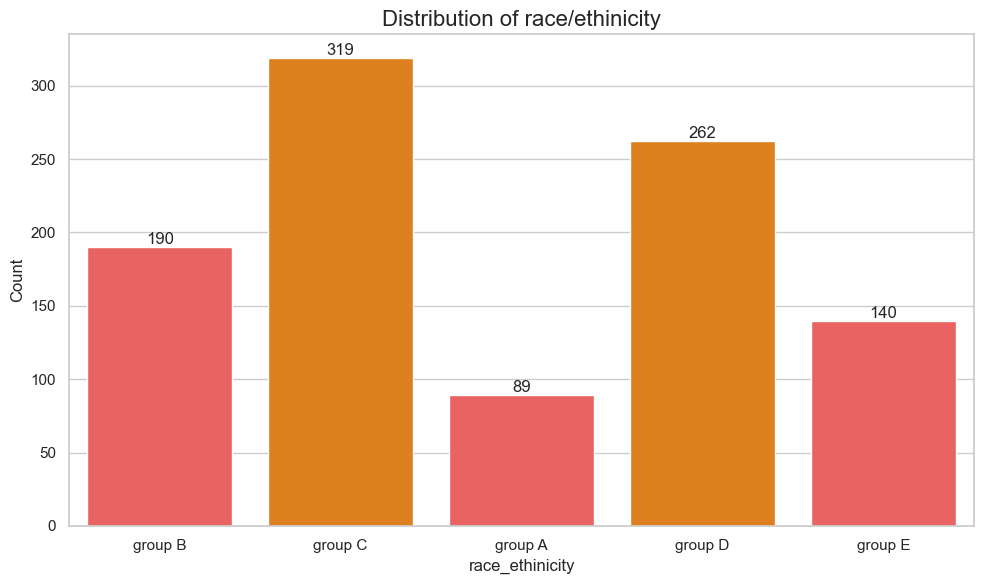

In [36]:
#now with the race column distribution and if race has any impact on student performance
#checking for the distribution of the gender feature
#checking if the gender is having any impact on the student performance
# Use Seaborn's styling functions
sns.set_theme()
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Use seaborn's countplot for a simple bar chart
sns.countplot(x='race_ethnicity', data=df, palette=['#ff4d4d', '#ff8000'])

# Add value labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i, label_type='edge')

# Customize the plot
plt.title('Distribution of race/ethinicity', fontsize=16)
plt.xlabel('race_ethinicity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

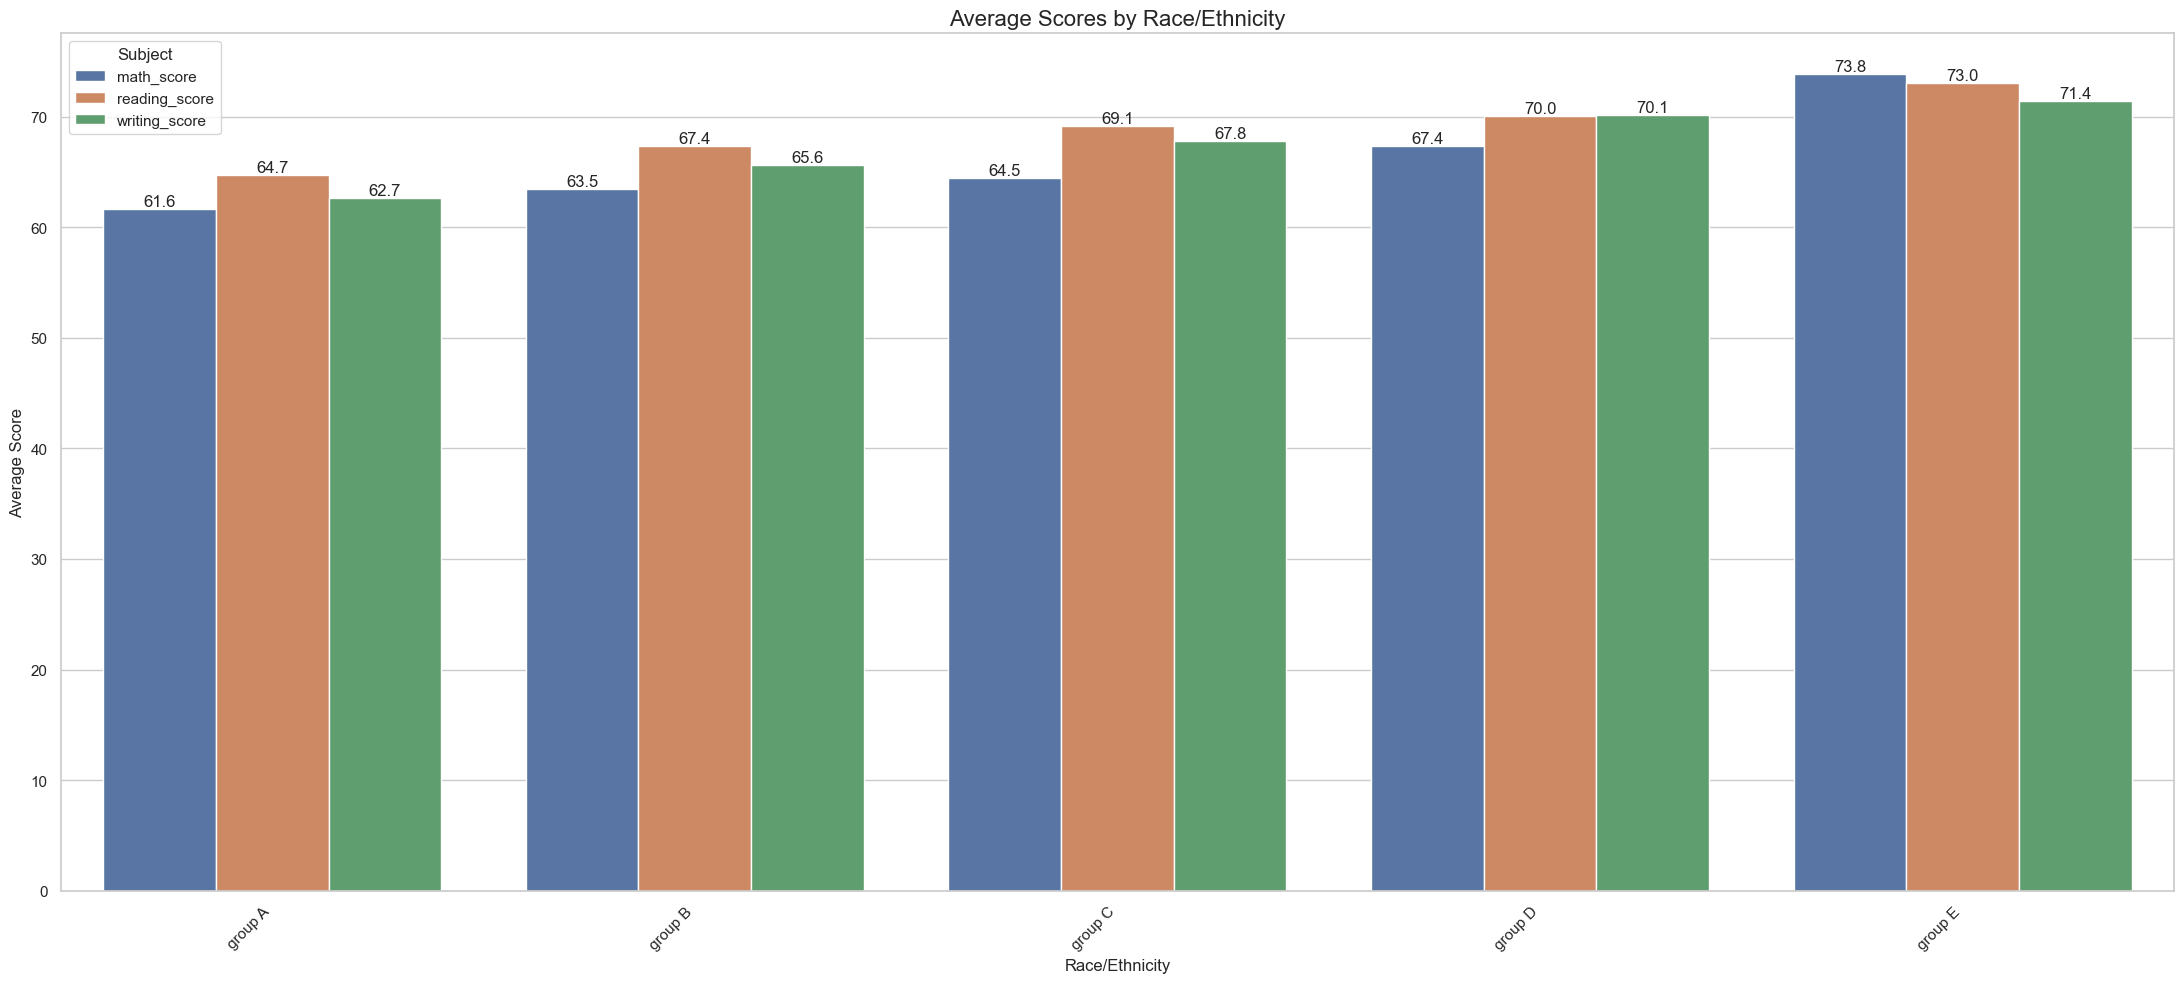

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean scores for each race/ethnicity
mean_scores = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Melt the dataframe to long format
melted_scores = mean_scores.melt(id_vars='race_ethnicity', var_name='Subject', value_name='Score')

# Create the plot
plt.figure(figsize=(22, 10))

# Use seaborn's barplot for a simple grouped bar chart
sns.barplot(x='race_ethnicity', y='Score', hue='Subject', data=melted_scores)

# Customize the plot
plt.title('Average Scores by Race/Ethnicity', fontsize=16)
plt.xlabel('Race/Ethnicity', fontsize=12)
plt.ylabel('Average Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

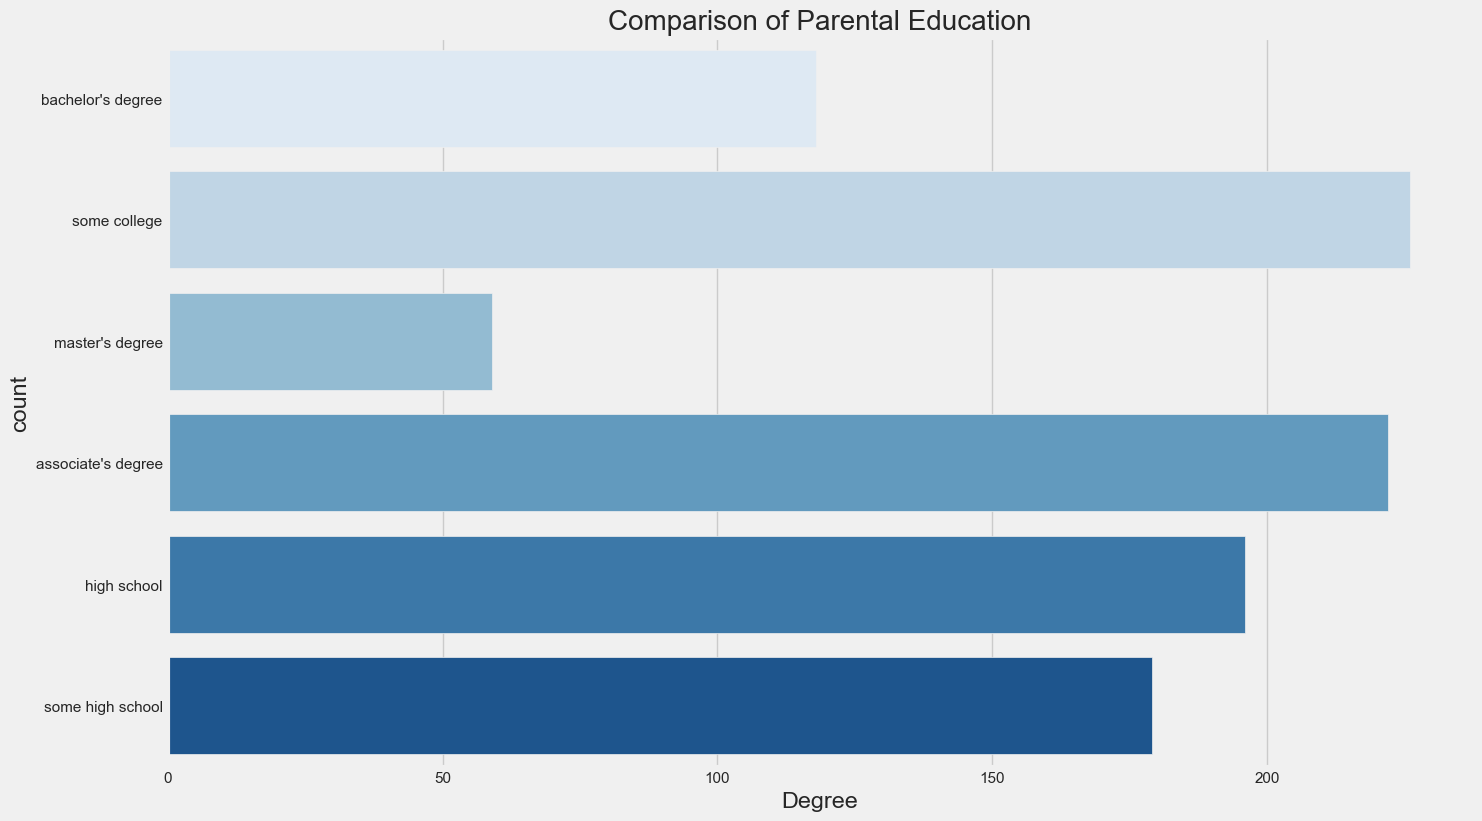

In [38]:
#Parental Level of Education:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Largest number of parents are from some college.


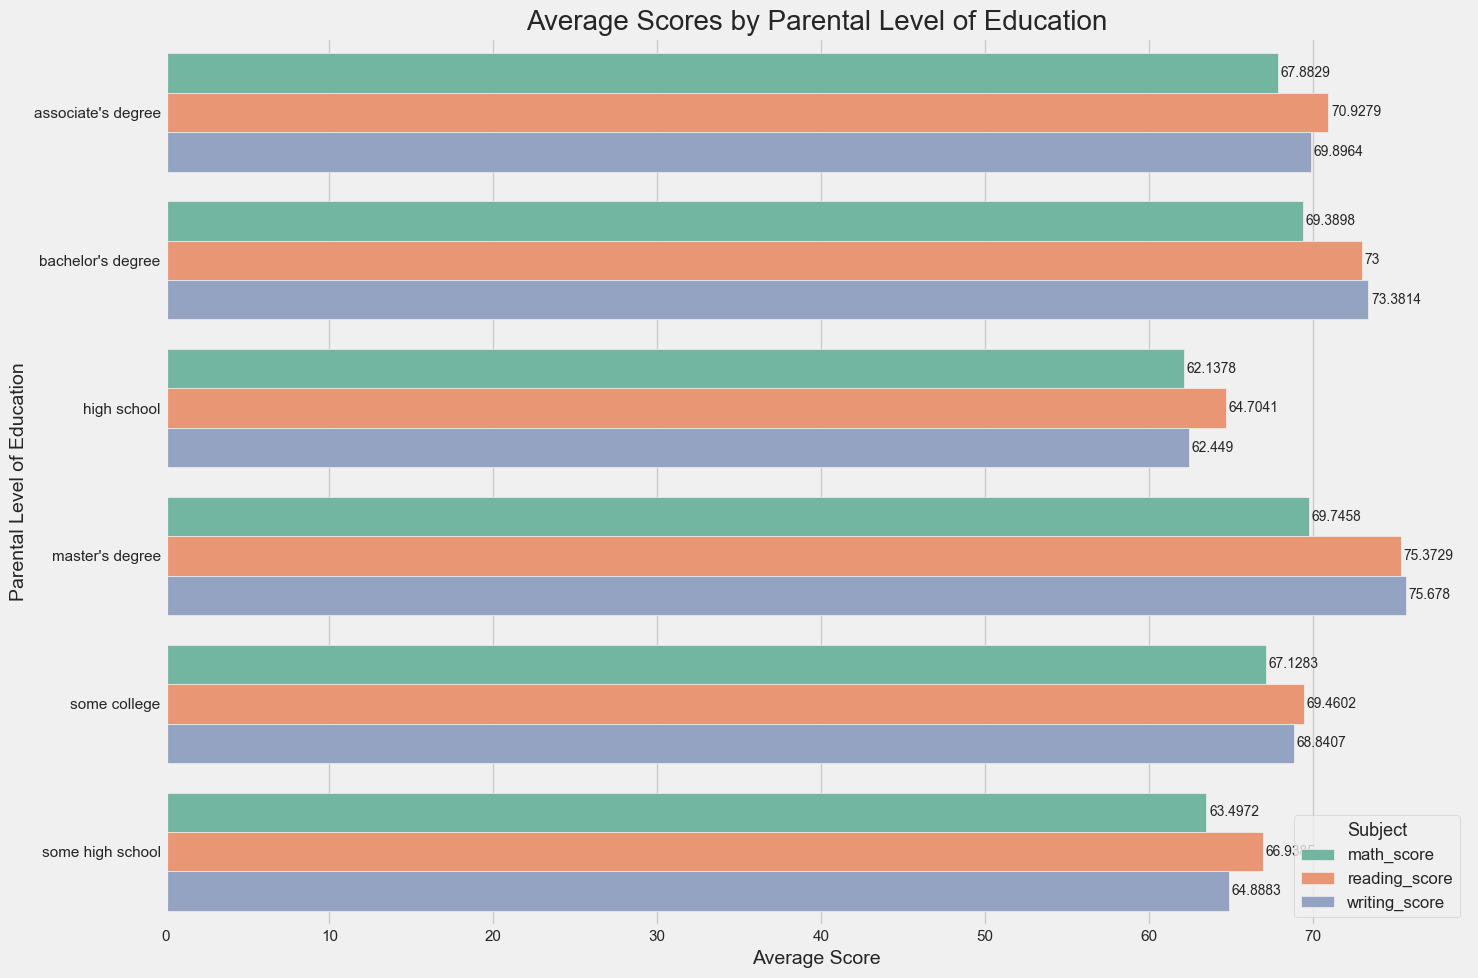

In [39]:

# Calculate mean scores for each parental education level
mean_scores = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

# Reset index to make 'parental_level_of_education' a column
mean_scores = mean_scores.reset_index()

# Melt the dataframe to long format
melted_scores = pd.melt(mean_scores, id_vars=['parental_level_of_education'],
                        value_vars=['math_score', 'reading_score', 'writing_score'],
                        var_name='Subject', value_name='Score')

# Create the plot
plt.figure(figsize=(15, 10))

# Use seaborn's barplot
sns.barplot(x='Score', y='parental_level_of_education', hue='Subject', data=melted_scores,
            palette='Set2', orient='h')

# Customize the plot
plt.title('Average Scores by Parental Level of Education', fontsize=20)
plt.xlabel('Average Score', fontsize=14)
plt.ylabel('Parental Level of Education', fontsize=14)

# Add value labels at the end of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i, label_type='edge', fontsize=10, padding=2)

# Adjust layout and show the plot
plt.legend(title='Subject', title_fontsize='13', fontsize='12', loc='lower right')
plt.tight_layout()
plt.show()

The score of student whose parents possess master and bachelor level education are higher than others.

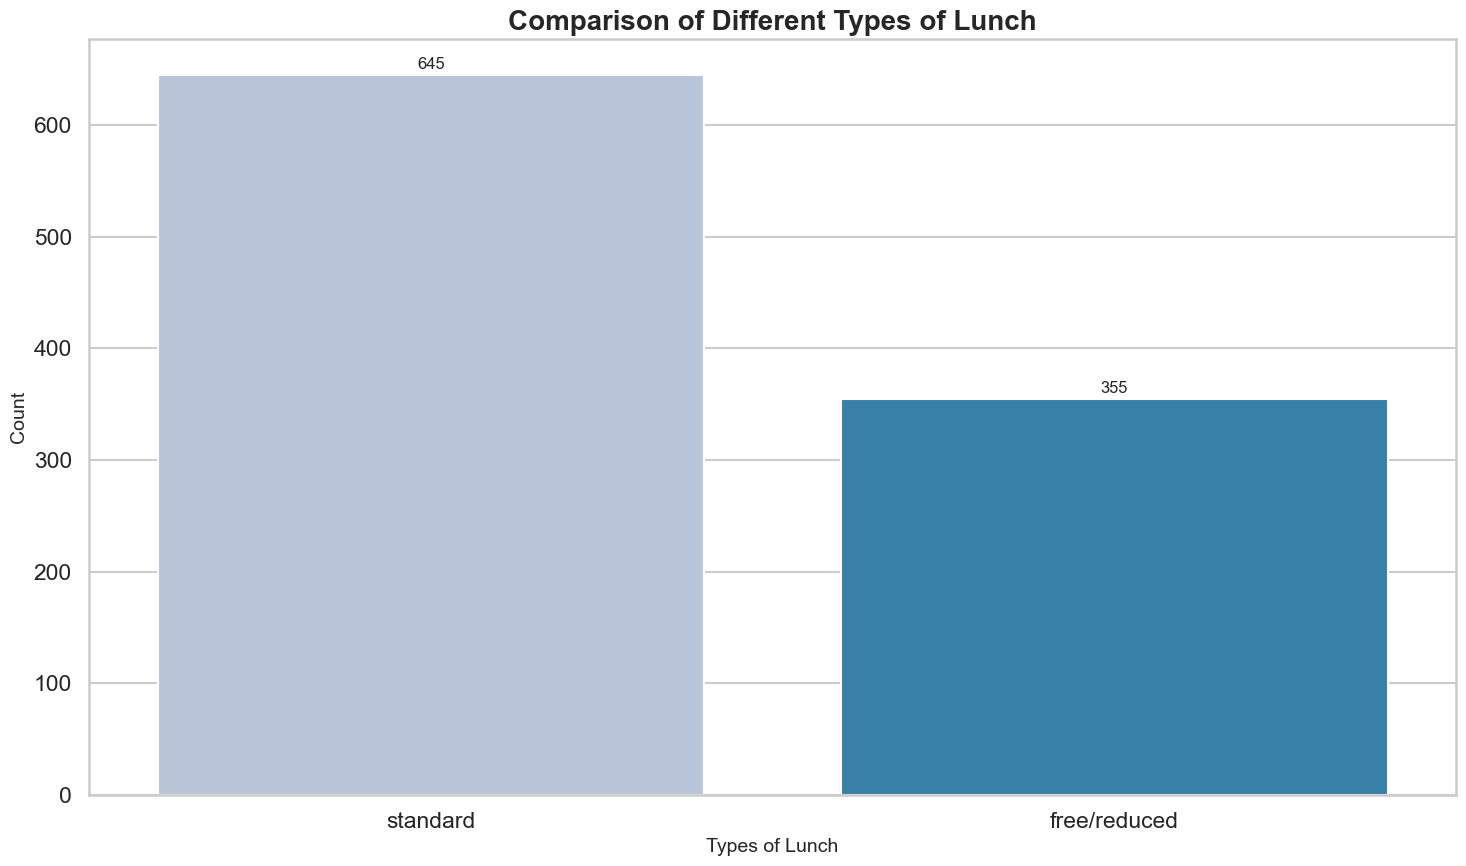

In [40]:
#lunch column distribution and  has any imapct on student performance
# Set the Seaborn theme and context
sns.set_theme(style="whitegrid", context="talk")

# Set figure size
plt.figure(figsize=(15, 9))

# Create the plot
sns.countplot(x='lunch', data=df, palette='PuBu')

# Customize the plot
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add value labels on top of each bar
for i in plt.gca().containers:
    plt.gca().bar_label(i, label_type='edge', fontsize=12, padding=2)

# Show the plot
plt.tight_layout()
plt.show()

Students being served Standard lunch was more than free lunch


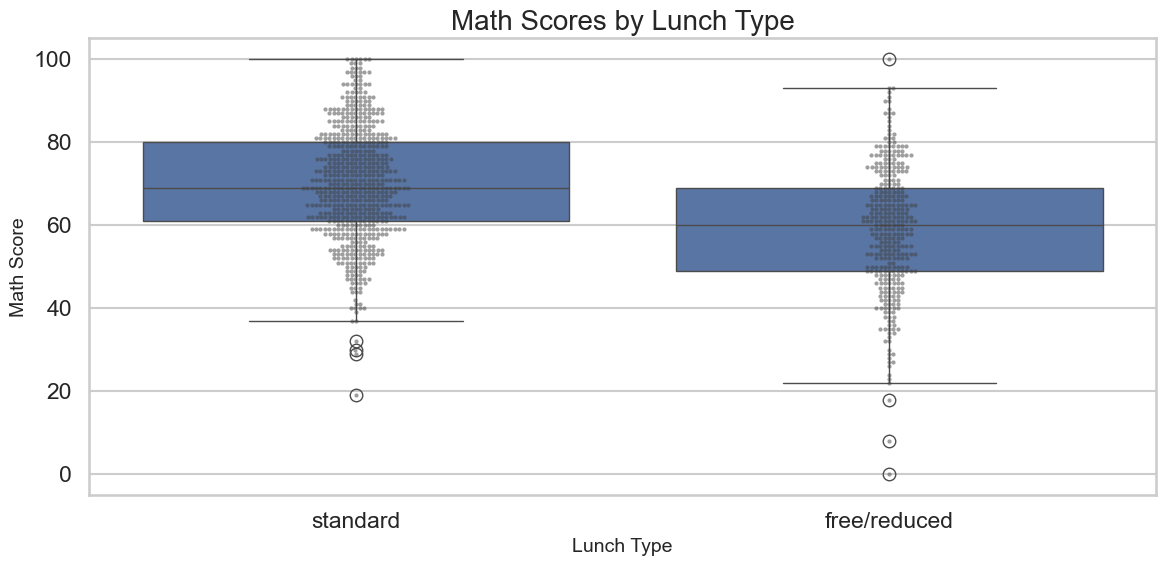

In [41]:

# Set the style and figure size
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(x='lunch', y='math_score', data=df)

# Customize the plot
plt.title('Math Scores by Lunch Type', fontsize=20)
plt.xlabel('Lunch Type', fontsize=14)
plt.ylabel('Math Score', fontsize=14)

# Add swarmplot for individual data points
sns.swarmplot(x='lunch', y='math_score', data=df, color=".25", size=3, alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()



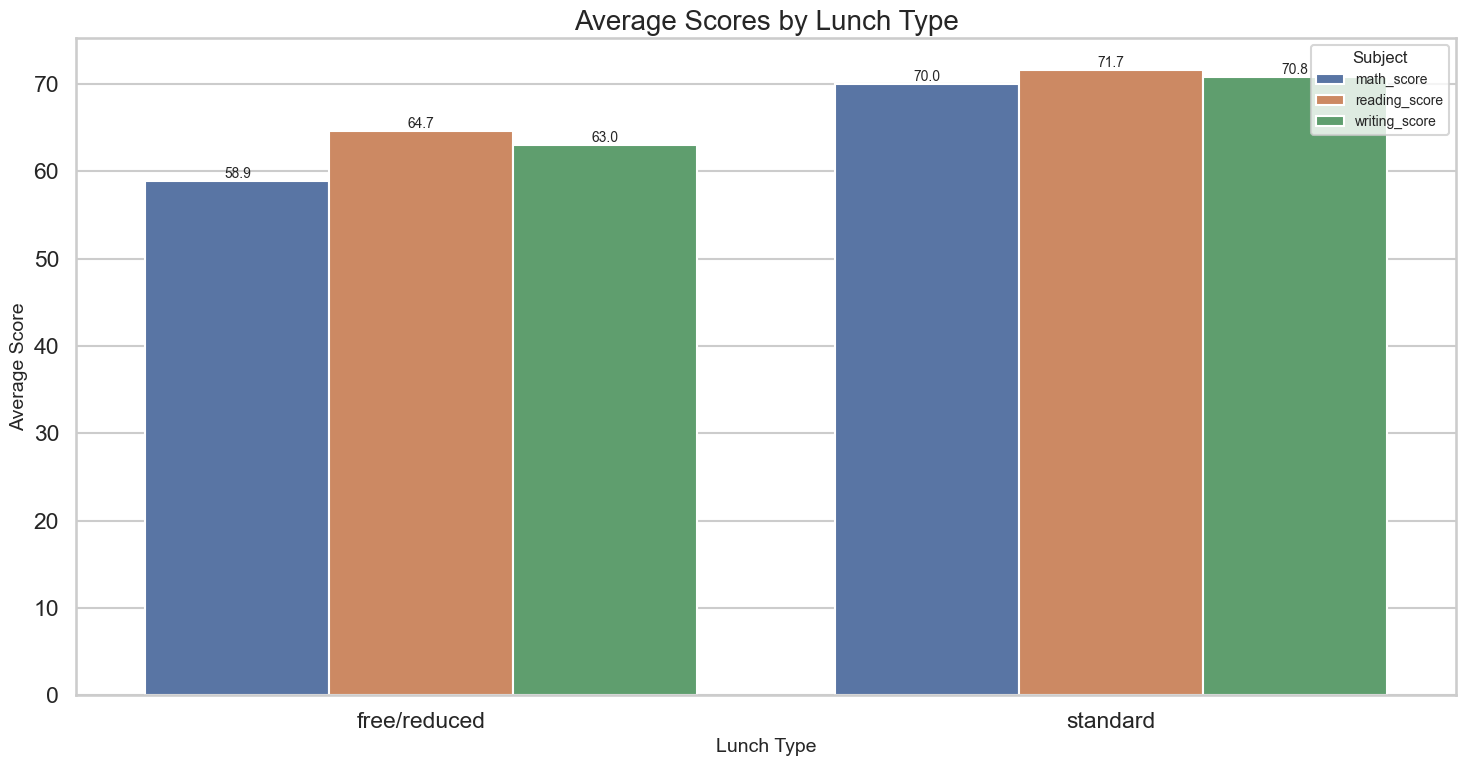

In [42]:

# Set the style and figure size
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(15, 8))

# Calculate mean scores for each lunch type
mean_scores = df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Melt the dataframe to long format for easier plotting
melted_scores = pd.melt(mean_scores, id_vars=['lunch'],
                        value_vars=['math_score', 'reading_score', 'writing_score'],
                        var_name='Subject', value_name='Score')

# Create the grouped bar plot
ax = sns.barplot(x='lunch', y='Score', hue='Subject', data=melted_scores, palette='deep')

# Customize the plot
plt.title('Average Scores by Lunch Type', fontsize=20)
plt.xlabel('Lunch Type', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

# Adjust the legend
plt.legend(title='Subject', title_fontsize='12', fontsize='10', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()




Students who get Standard Lunch tend to perform better than students who got free/reduced lunch




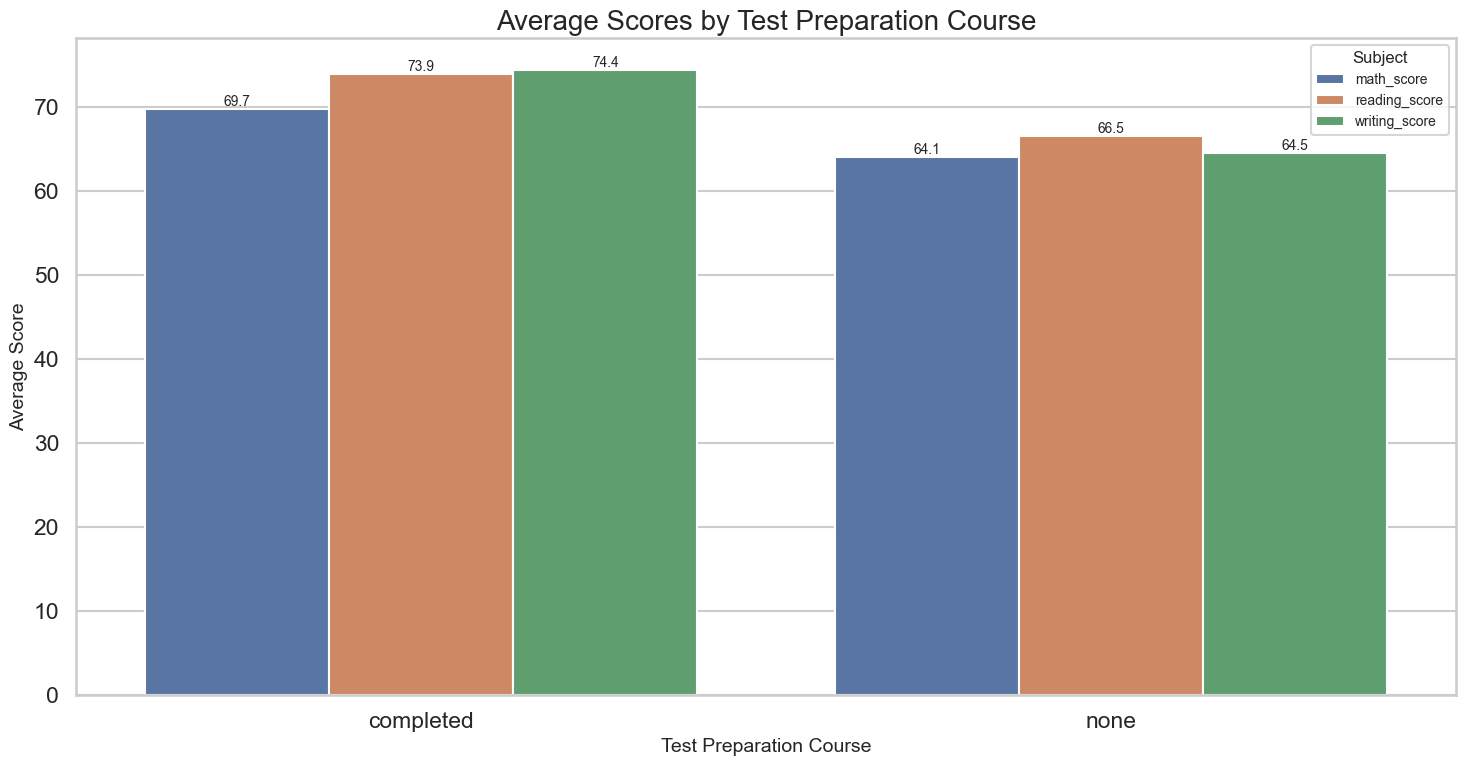

In [43]:
#luch Preaparation column:


# Set the style and figure size
sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(15, 8))

# Calculate mean scores for each test preparation category
mean_scores = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Melt the dataframe to long format for easier plotting
melted_scores = pd.melt(mean_scores, id_vars=['test_preparation_course'],
                        value_vars=['math_score', 'reading_score', 'writing_score'],
                        var_name='Subject', value_name='Score')

# Create the grouped bar plot
ax = sns.barplot(x='test_preparation_course', y='Score', hue='Subject', data=melted_scores, palette='deep')

# Customize the plot
plt.title('Average Scores by Test Preparation Course', fontsize=20)
plt.xlabel('Test Preparation Course', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=10)

# Adjust the legend
plt.legend(title='Subject', title_fontsize='12', fontsize='10', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

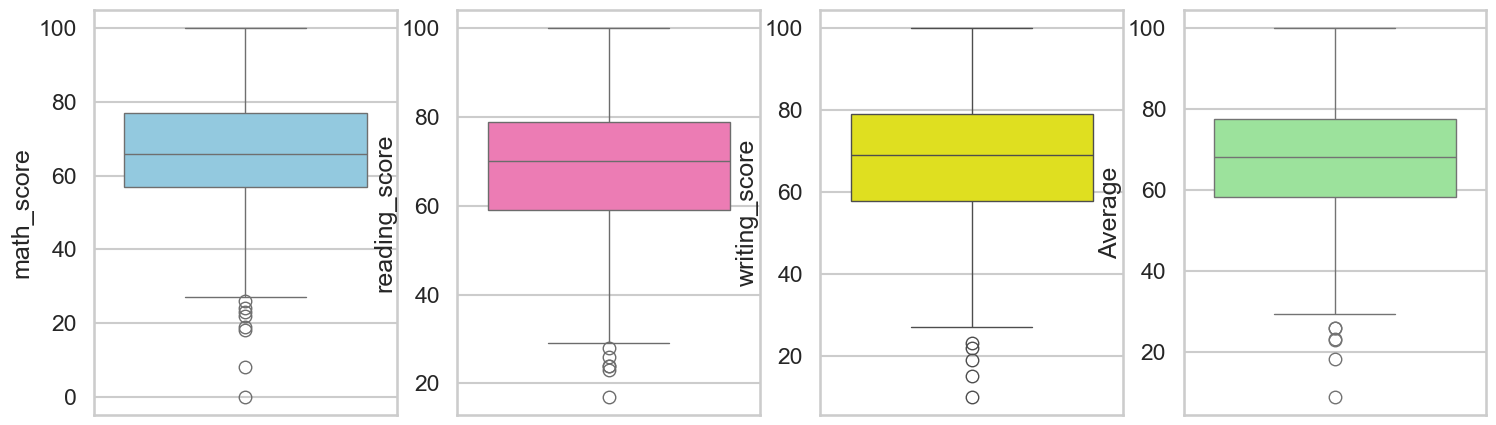

In [44]:
#Checking for the outliers:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

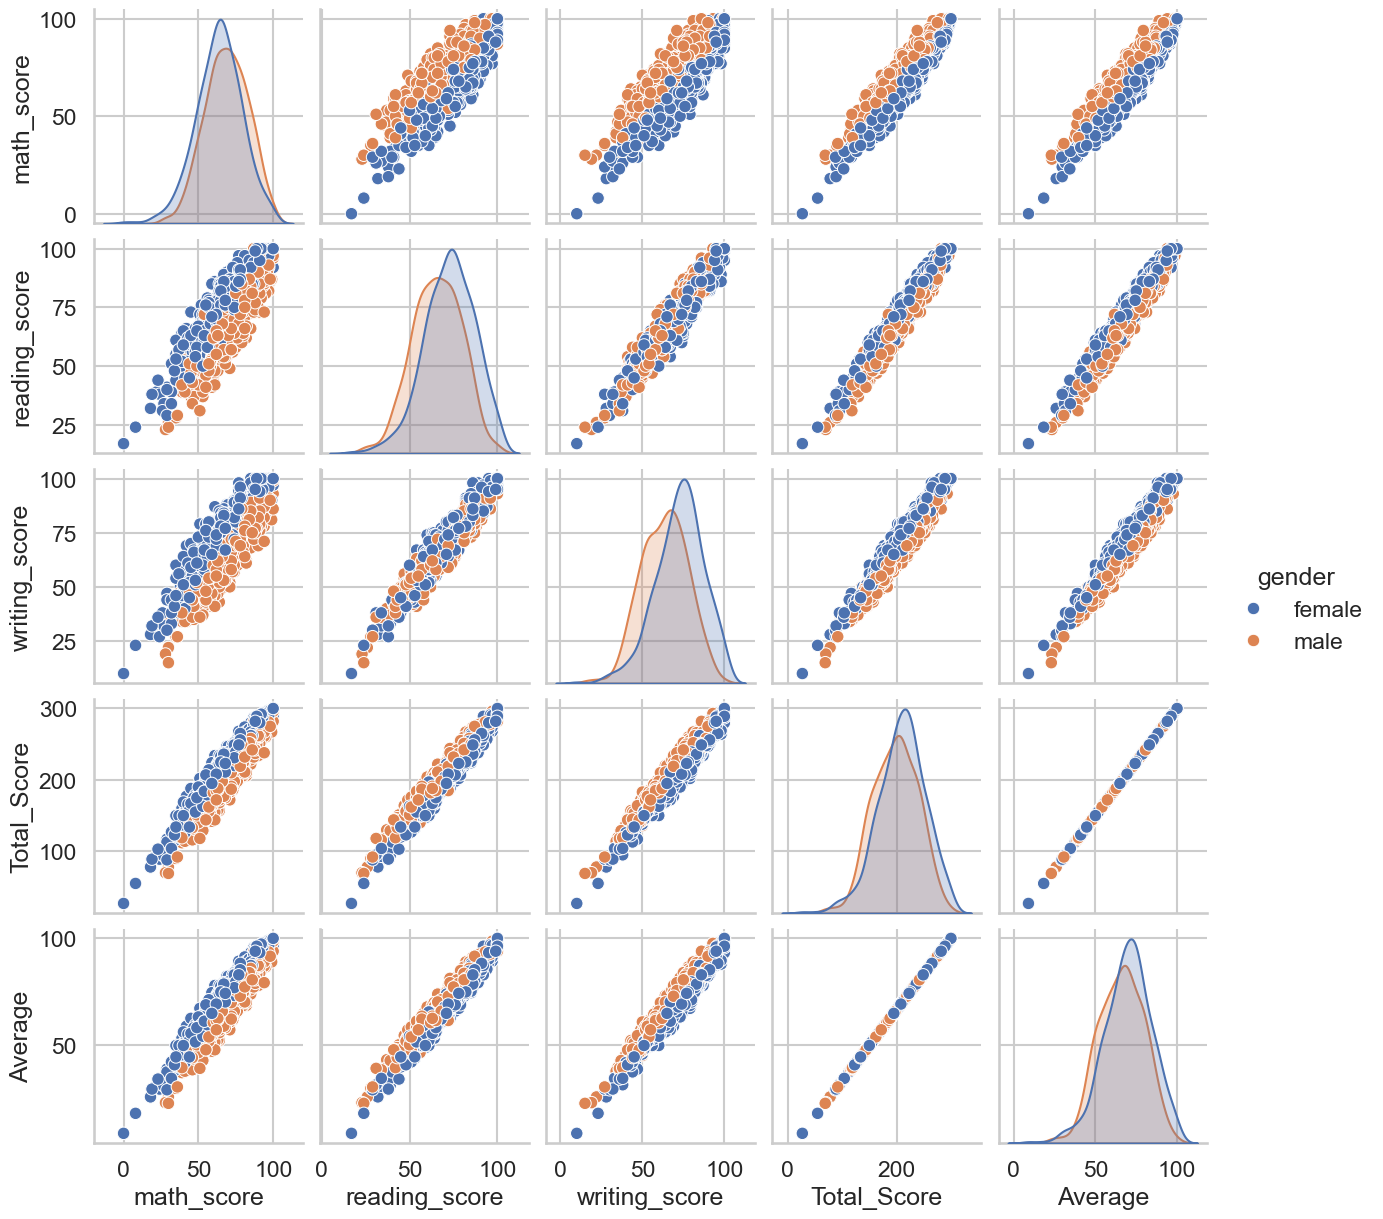

In [45]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.


Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitia